<a href="https://www.kaggle.com/code/sagarkanade721/project-insurancepredictor-polynomialregression?scriptVersionId=100004992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Task: Can you accurately predict insurance costs?** 

In [2]:
df=pd.read_csv('../input/insurance-prediction/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
cat_feats=['sex','smoker','region']

Note: When i worked on this data on jupyter notebook, dtype of catagorical features were object, so i am aligning this data with the data i worked on by converting dtypes of categorical variables from 'int' to 'object'

In [5]:
for feat in cat_feats:
    df[feat]=df[feat].astype(str)

In [6]:
sex={'0':'female','1':'male'}
smoker={'1':'yes','0':'no'}
region={'0':'northeast','1':'northwest','2':'southeast','3':'southwest'}

In [7]:
df['sex']=df['sex'].map(sex)
df['smoker']=df['smoker'].map(smoker)
df['region']=df['region'].map(region)

#### --- EDA ---

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    object 
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    object 
 5   region    348 non-null    object 
 6   charges   348 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 19.2+ KB


In [9]:
#lets separate catagorigal and numerical data:

cat_df=df.select_dtypes(include=object) #categorical data
num_df=df.select_dtypes(exclude=object)
num_df=num_df.drop('charges',axis=1)#numerical data
cat_df_charges=pd.concat([cat_df,df['charges']],axis=1) #categorical data with target variable
num_df_charges=pd.concat([num_df,df['charges']],axis=1) #numerical data with target variable

In [10]:
#Lets check the feature details:

In [11]:
cat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [12]:
class feature_details:
    
    
    def categorical_feature_details(self,categorical_df):
        
        print("\n==================================================================")
        print("                   CATEGORICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=categorical_df.columns
    
        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________")



            #nulls
            
            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=(nulls/(len(df[col])))*100
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))

            uniqs=df[col].unique()
            print("\n    Unique values are:")
            for i in range(len(uniqs)):
                print('    ',i+1,'-',uniqs[i])
                
                
                
                
    def categorywise_outliers_details(self,categorical_df,target_column):
        
        df=pd.concat([categorical_df,target_column],axis=1)
        targetcol=target_column.name
        cols=df.columns
        
        
        print("\n=====================================================================")
        print("\n                   CATEGORYWISE OUTLIERS DETAILS:                    ")
        print("               (with respect to target variable: {} )               \n".format(targetcol))

        print("=====================================================================")
        
        
        for i in range(len(cols)):

            col=cols[i]

            if col==targetcol:
                continue
            else:
                print("\n\n________________")
                print("\nCOLUMN: {} ".format(col.upper()))
                print("________________")
                cats=df[col].unique()
            
            for i in range(len(cats)):
                cat=cats[i]

                print("\n\n      {}. Category: {} \n".format(i+1,cat))



                q75,q25=np.percentile(df[df[col]==cat][targetcol],[75,25])
                iqr=np.round(q75-q25,3)
                upperlim=np.round(q75+(1.5*iqr),3)
                lowerlim=np.round(q25-(1.5*iqr),3)



                upper_indexes=df[(df[col]==cat) & (df[targetcol]>upperlim)].index
                lower_indexes=df[(df[col]==cat) & (df[targetcol]<lowerlim)].index

                mini=df[df[col]==cat][targetcol].min()
                maxi=df[df[col]==cat][targetcol].max()
                avg=np.round(df[df[col]==cat][targetcol].mean(),2)
                print("                Minimum {} for {} is: {}".format(targetcol,cat,mini))
                print("                Maximum {} for {} is: {}".format(targetcol,cat,maxi))
                print("                Average {} for {} is: {}\n".format(targetcol,cat,avg))
                
                print("                Upper Limit is {}".format(upperlim))
                print("                Lower Limit is {}".format(lowerlim))
                
                
                
                if (len(upper_indexes)>0) or (len(lower_indexes)>0):

                    if len(upper_indexes)>0:
                        print("\n                  >>> HIGHER OUTLIERS: {} ".format(len(upper_indexes)))
                        print("                \nOutliers are at index nos: \n",list(upper_indexes))
                        

                    if len(lower_indexes)>0:
                        print("                  >>> LOWER OUTLIERS: {} \n".format(len(lower_indexes)))
                        print("                \nOutliers are at index nos: \n",list(lower_indexes))
                        

                else:
                    print("                  NO OUTLIERS")
                    
                    
                
            
                

                
                
    def numerical_feature_details(self,numerical_df):
        print("\n==================================================================")
        print("                   NUMERICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=numerical_df.columns

        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________\n")


            
            mins=df[col].min()
            maxs=df[col].max()
            avgs=np.round(df[col].mean(),2)
            
            print("Minimum {} is {}".format(col,mins))
            print("Maximum {} is {}".format(col,maxs))
            print("Average {} is {}".format(col,avgs))
            
            
            
            
            #nulls

            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=(nulls/(len(df[col])))*100
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))



            #outliers
            
            print('\nOUTLIERS:-\n')


            q75,q25=np.percentile(df[col],[75,25])
            iqr=np.round(q75-q25,3)
            upperlim=np.round(q75+(1.5*iqr),3)
            lowerlim=np.round(q25-(1.5*iqr),3)
            
            print("    25th Percentile is: ",q25)
            print("    75th Percentile is: ",q75)

            print("    Inter Quartile range is: ",iqr)

            print("    Upper limit is: ", upperlim)
            print("    Lower limit is: ", lowerlim)
                        
            print('\n')    
            print("    >>> HIGHER OUTLIERS: {} ".format(len(df[df[col]>upperlim])))
            print("    >>> LOWER OUTLIERS: {} ".format(len(df[df[col]<lowerlim])))
            print('\n\n')


            
            

       

In [13]:
feature_details=feature_details()

In [14]:
feature_details.categorical_feature_details(cat_df)


                   CATEGORICAL FEATURE DETAILS                     


________________

Feature: sex
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 348 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 2 unique values

    Unique values are:
     1 - female
     2 - male


________________

Feature: smoker
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 348 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 2 unique values

    Unique values are:
     1 - yes
     2 - no


________________

Feature: region
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 348 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 4 unique values

    Unique values are:
     1 - southwest
     2 - southeast
     3 - northwest
     4 - northeast


In [15]:
feature_details.numerical_feature_details(num_df_charges)


                   NUMERICAL FEATURE DETAILS                     


________________

Feature: age
________________

Minimum age is 18
Maximum age is 64
Average age is 39.59


NULLS:-

    0.0 % Null values 
    (i.e Out of 348 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 47 unique values

OUTLIERS:-

    25th Percentile is:  27.0
    75th Percentile is:  53.0
    Inter Quartile range is:  26.0
    Upper limit is:  92.0
    Lower limit is:  -12.0


    >>> HIGHER OUTLIERS: 0 
    >>> LOWER OUTLIERS: 0 





________________

Feature: bmi
________________

Minimum bmi is 15.96
Maximum bmi is 49.06
Average bmi is 30.68


NULLS:-

    0.0 % Null values 
    (i.e Out of 348 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 247 unique values

OUTLIERS:-

    25th Percentile is:  26.7825
    75th Percentile is:  34.7775
    Inter Quartile range is:  7.995
    Upper limit is:  46.77
    Lower limit is:  14.79


    >>> HIGHER OUTLIERS: 2 
    >>> LOWER 

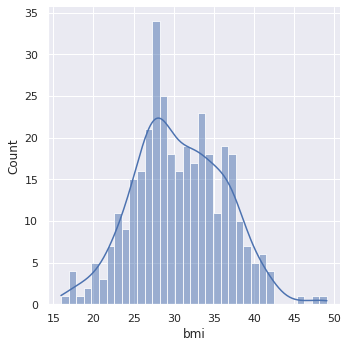

In [16]:
#there are '9' outliers in 'bmi' and '139' outliers in 'charges' feature, lets check them:

#bmi
sns.displot(df['bmi'],bins=35,kde=True)

In [17]:
df[df['bmi']>47.291].sort_values('bmi') #checking data for upper limit (bmi more than: q75+1.5(iqr))

,age,sex,bmi,children,smoker,region,charges
286,46,female,48.07,2,no,northeast,9432.9253
116,58,male,49.06,0,no,southeast,11381.3254


##### Conclusion: data looks ok  as there may be some obese people

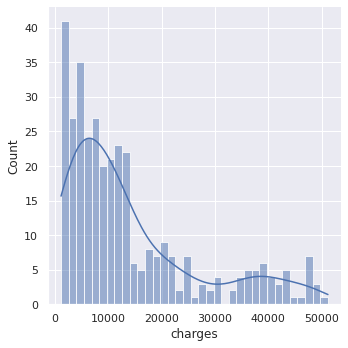

In [18]:
#charges
sns.displot(df['charges'],bins=35,kde=True)

In [19]:
df[df['charges']>34489.35].sort_values('charges')

,age,sex,bmi,children,smoker,region,charges
223,19,male,34.800,0,yes,southwest,34779.61500
314,27,female,31.400,0,yes,southwest,34838.87300
242,55,female,26.800,1,no,southwest,35160.13457
322,34,male,30.800,0,yes,southwest,35491.64000
30,22,male,35.600,0,yes,southwest,35585.57600
161,18,female,36.850,0,yes,southeast,36149.48350
263,19,male,36.955,0,yes,northwest,36219.40545
19,30,male,35.300,0,yes,southwest,36837.46700
158,30,male,35.530,0,yes,southeast,36950.25670
203,27,female,36.080,0,yes,southeast,37133.89820


In [20]:
df[df['charges']>34489.35].sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.800,1,no,southwest,35160.13457
146,46,male,30.495,3,yes,northwest,40720.55105
322,34,male,30.800,0,yes,southwest,35491.64000
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
123,44,male,31.350,1,yes,northeast,39556.49450
314,27,female,31.400,0,yes,southwest,34838.87300
254,50,male,31.825,0,yes,northeast,41097.16175
23,34,female,31.920,1,yes,northeast,37701.87680
251,63,female,32.200,2,yes,southwest,47305.30500


[Text(0, 0, '32313.9'), Text(0, 0, '8465.49')]

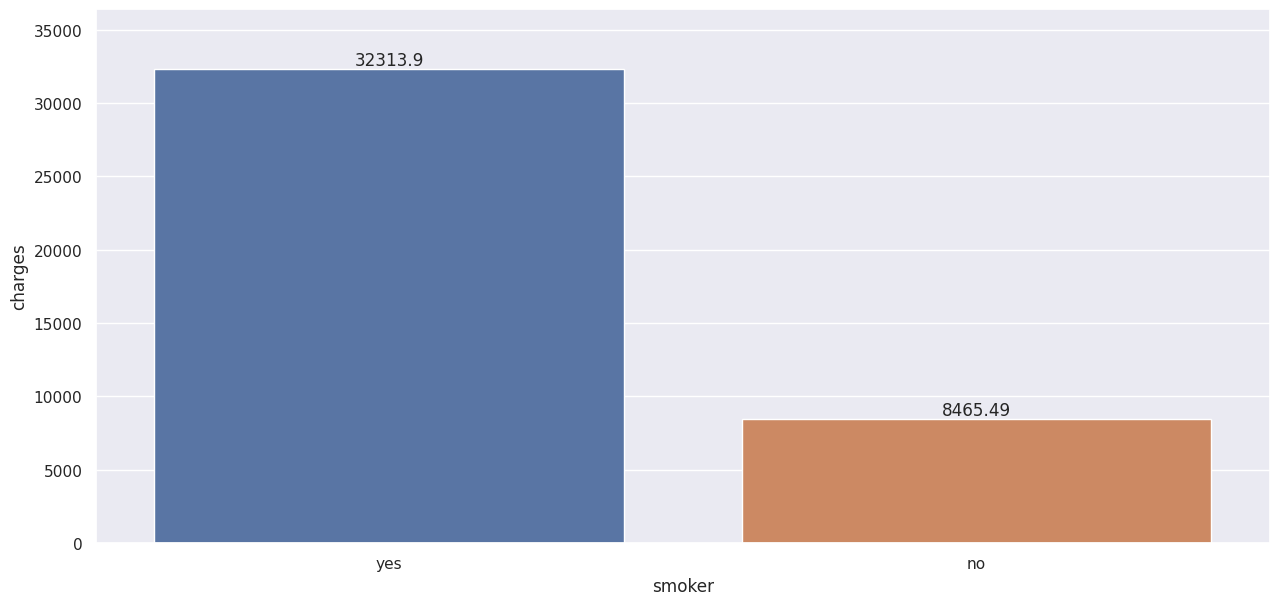

In [21]:
#Average charges for smokers:

plt.figure(figsize=(15,7),dpi=101)
ax=sns.barplot(x=df['smoker'],y=df['charges'],errwidth=0)
ax.bar_label(ax.containers[0])

In [22]:
hichargesdf=df[df['charges']>34489.35]

In [23]:
hichargesdf['smoker'].value_counts()

yes    43
no      1
Name: smoker, dtype: int64

In [24]:
hichargesdf[hichargesdf['smoker']=='no']

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.8,1,no,southwest,35160.13457


In [25]:
hichargesdf.sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.800,1,no,southwest,35160.13457
146,46,male,30.495,3,yes,northwest,40720.55105
322,34,male,30.800,0,yes,southwest,35491.64000
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
123,44,male,31.350,1,yes,northeast,39556.49450
314,27,female,31.400,0,yes,southwest,34838.87300
254,50,male,31.825,0,yes,northeast,41097.16175
23,34,female,31.920,1,yes,northeast,37701.87680
251,63,female,32.200,2,yes,southwest,47305.30500


    BMI          :  Nutritional status

    Below 18.5   :  Underweight
    18.5–24.9    :  Normal weight
    25.0–29.9    :  Pre-obesity
    30.0–34.9    :  Obesity class I
    35.0–39.9    :  Obesity class II
    Above 40     :  Obesity class III

(Source:https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations)


    -bmi:
        out of 139 people with high charges:
            - 138  people are above Pre-Obesity status
            - 1 person is at normal weight but is Smoker and  45 years old
    


    - Smokers:
         out of 139 people with high charges: :
            - 136 peoples are Smokers (average charges for smokers are 32050.2 & higher limit for charges is 34489.35 )
            - 3 peoples are Non smokers (ages of non smokers are 55,59 & 61)
            
            
        
**Conclusion:** 

with respect to above information, data says that people with high charges are either with high bmi, smokers or are older.
data looks legitimate so, no need of feature engineering here.
        
        


In [26]:
#CATEGORYWISE OUTLIERS DETAILS:

In [27]:
feature_details.categorywise_outliers_details(cat_df,df['charges'])



                   CATEGORYWISE OUTLIERS DETAILS:                    
               (with respect to target variable: charges )               



________________

COLUMN: SEX 
________________


      1. Category: female 

                Minimum charges for female is: 1615.7667
                Maximum charges for female is: 48824.45
                Average charges for female is: 12756.36

                Upper Limit is 29122.993
                Lower Limit is -9468.487

                  >>> HIGHER OUTLIERS: 17 
                
Outliers are at index nos: 
 [23, 84, 86, 94, 103, 128, 161, 175, 203, 240, 242, 244, 251, 288, 314, 328, 330]


      2. Category: male 

                Minimum charges for male is: 1137.011
                Maximum charges for male is: 51194.55914
                Average charges for male is: 15233.78

                Upper Limit is 46089.051
                Lower Limit is -20218.617

                  >>> HIGHER OUTLIERS: 6 
                
Outliers are

In [28]:
#Verification of Categorywise outliers with respect to target variable 'charges':

#1. Sex:female, higher limit:28808.991

df[(df['sex']=='female') &(df['charges']>28808.991)].sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges
128,32,female,17.765,2,yes,northwest,32734.18630
9,60,female,25.840,0,no,northwest,28923.13692
242,55,female,26.800,1,no,southwest,35160.13457
244,63,female,27.740,0,yes,northeast,29523.16560
103,61,female,29.920,3,yes,southeast,30942.19180
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
314,27,female,31.400,0,yes,southwest,34838.87300
23,34,female,31.920,1,yes,northeast,37701.87680
251,63,female,32.200,2,yes,southwest,47305.30500


In [29]:
#Categorywise outliers with respect to target variable 'charges':

#2. Sex:male, higher limit:40545.274

df[(df['sex']=='male') &(df['charges']>40545.274)].sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges
146,46,male,30.495,3,yes,northwest,40720.55105
254,50,male,31.825,0,yes,northeast,41097.16175
338,50,male,32.300,1,yes,northeast,41919.09700
256,56,male,33.630,0,yes,northwest,43921.18370
271,50,male,34.200,2,yes,southwest,42856.83800
252,54,male,34.210,2,yes,southeast,44260.74990
109,63,male,35.090,0,yes,southeast,47055.53210
312,43,male,35.970,3,yes,southeast,42124.51530
34,28,male,36.400,1,yes,southwest,51194.55914
327,45,male,36.480,2,yes,northwest,42760.50220


In [30]:
df[(df['sex']=='male') &(df['charges']>40545.274)].sort_values('age')

,age,sex,bmi,children,smoker,region,charges
292,25,male,45.540,2,yes,southeast,42112.23560
34,28,male,36.400,1,yes,southwest,51194.55914
185,36,male,41.895,3,yes,northeast,43753.33705
312,43,male,35.970,3,yes,southeast,42124.51530
327,45,male,36.480,2,yes,northwest,42760.50220
146,46,male,30.495,3,yes,northwest,40720.55105
265,46,male,42.350,3,yes,southeast,46151.12450
254,50,male,31.825,0,yes,northeast,41097.16175
271,50,male,34.200,2,yes,southwest,42856.83800
338,50,male,32.300,1,yes,northeast,41919.09700


In [31]:
#Categorywise outliers with respect to target variable 'charges':

#3. Smoker:No, higher limit:22427.559

df[(df['smoker']=='no') &(df['charges']>22427.559)].sort_values('bmi')


,age,sex,bmi,children,smoker,region,charges
140,34,male,22.420,2,no,northeast,27375.90478
219,24,female,23.210,0,no,southeast,25081.76784
62,64,male,24.700,1,no,northwest,30166.61817
9,60,female,25.840,0,no,northwest,28923.13692
289,52,male,26.400,3,no,southeast,25992.82104
242,55,female,26.800,1,no,southwest,35160.13457
115,60,male,28.595,0,no,northeast,30259.99556
321,26,female,29.640,4,no,northeast,24671.66334
245,54,male,30.020,0,no,northwest,24476.47851
138,54,female,31.900,3,no,southeast,27322.73386


In [32]:
#Categorywise outliers with respect to target variable 'charges':

#4. Region:Southwest, higher limit:26529.695

df[(df['region']=='southwest') &(df['charges']>26529.695)].sort_values('bmi')


,age,sex,bmi,children,smoker,region,charges
242,55,female,26.8,1,no,southwest,35160.13457
322,34,male,30.8,0,yes,southwest,35491.64000
94,64,female,31.3,2,yes,southwest,47291.05500
314,27,female,31.4,0,yes,southwest,34838.87300
251,63,female,32.2,2,yes,southwest,47305.30500
328,64,female,33.8,1,yes,southwest,47928.03000
271,50,male,34.2,2,yes,southwest,42856.83800
84,37,female,34.8,2,yes,southwest,39836.51900
223,19,male,34.8,0,yes,southwest,34779.61500
19,30,male,35.3,0,yes,southwest,36837.46700


In [33]:
#Categorywise outliers with respect to target variable 'charges':

#5. Region:Southeast, higher limit:42154.388

df[(df['region']=='southeast') &(df['charges']>42154.388)].sort_values('age')



,age,sex,bmi,children,smoker,region,charges
265,46,male,42.35,3,yes,southeast,46151.1245
252,54,male,34.21,2,yes,southeast,44260.7499
109,63,male,35.09,0,yes,southeast,47055.5321


In [34]:
#Categorywise outliers with respect to target variable 'charges':

#6. Region:Northwest, higher limit:29699.754

df[(df['region']=='northwest') &(df['charges']>29699.754)].sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges
128,32,female,17.765,2,yes,northwest,32734.18630
62,64,male,24.700,1,no,northwest,30166.61817
146,46,male,30.495,3,yes,northwest,40720.55105
86,57,female,31.160,0,yes,northwest,43578.93940
259,19,male,31.920,0,yes,northwest,33750.29180
256,56,male,33.630,0,yes,northwest,43921.18370
298,31,male,34.390,3,yes,northwest,38746.35510
327,45,male,36.480,2,yes,northwest,42760.50220
55,58,male,36.955,2,yes,northwest,47496.49445
263,19,male,36.955,0,yes,northwest,36219.40545


In [35]:
#Categorywise outliers with respect to target variable 'charges':

#6. Region:Northeast, higher limit:33926.927

df[(df['region']=='northeast') &(df['charges']>33926.927)].sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges
123,44,male,31.350,1,yes,northeast,39556.49450
254,50,male,31.825,0,yes,northeast,41097.16175
23,34,female,31.920,1,yes,northeast,37701.87680
338,50,male,32.300,1,yes,northeast,41919.09700
330,61,female,36.385,1,yes,northeast,48517.56315
38,35,male,36.670,1,yes,northeast,39774.27630
240,23,female,36.670,2,yes,northeast,38511.62830
288,59,female,36.765,1,yes,northeast,47896.79135
281,54,male,40.565,3,yes,northeast,48549.17835
185,36,male,41.895,3,yes,northeast,43753.33705


#### Categorywise Outliers detailed info:
    
    #1. Sex:female:- 
    
             Total instances: 65
                    - 64 instances are above 25 bmi value (i.e above Pre-Obesity state)
                    - 1 instance is Underweighted is also a smoker

    #2. Sex: Male:-

    Total instances: 44
            - All instances are above Obesity class I & are Smokers
            - 36 instances are above 40 years old
                - out of remaining 6 instances 4 instances have more than 2 childrens

    #3. Smoker: No:-

    Total instances: 46
            - 39 instances are above Pre-Obesity stage
            - 36 instances are above 40 years old
                - out of remaining 7 instances 3 instances are more than 40 years old

    #4. Region:Southwest:-

    Total instances: 38
            - All instances are above Pre-Obesity stage.
            - 35 instances are Smokers
                - remaining 3  who are Non Smokers are more than 50 years old.


    #5. Region:Southeast:-

    Total instances: 26
            - All instances are above Obesity class I & are Smokers
            - 25 instances are above 40 years old
                - out of remaining 1 instances has bmi of 52.58 (which is very High!)


    #6. Region:Northwest:-

    Total instances: 29
            - 25 instances are above Obesity class I, 23 are Smokers, (2 who are Non smokers are above 50 years old)
                - out of remaining 4 instances 3 instances are at Pre-Obesity stage out of 2 are Smokers
                    - remaining 1 intance is underweighted and has 2 childrens and also smokes


    #7. Region:Northeast:-

    Total instances: 29
            - All are smokers
            - 26 instances are above Obesity class I
                    - out of remaining 3 instances 2 instances are at Pre-Obesity stage. i instance is of 45 years old


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 3020x1057 with 0 Axes>

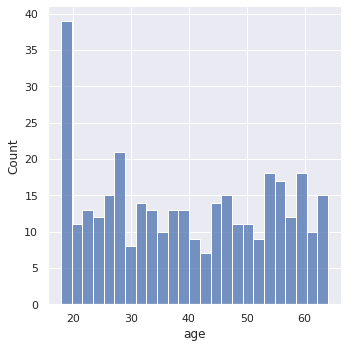

<Figure size 3020x1057 with 0 Axes>

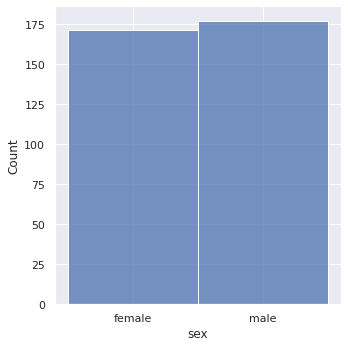

<Figure size 3020x1057 with 0 Axes>

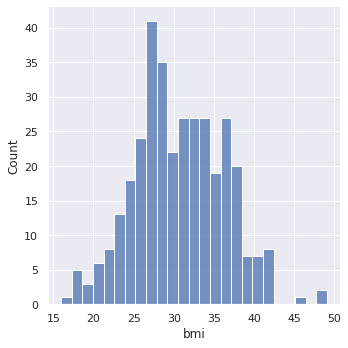

<Figure size 3020x1057 with 0 Axes>

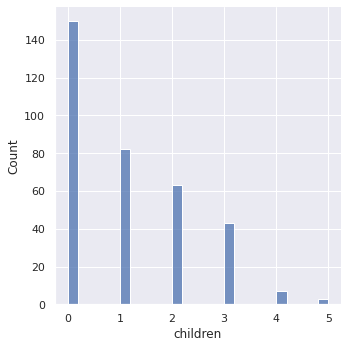

<Figure size 3020x1057 with 0 Axes>

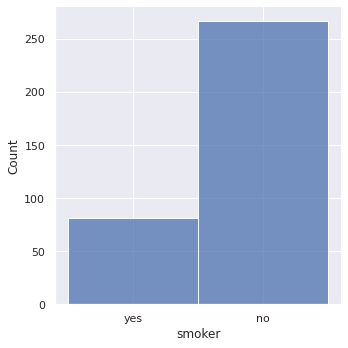

<Figure size 3020x1057 with 0 Axes>

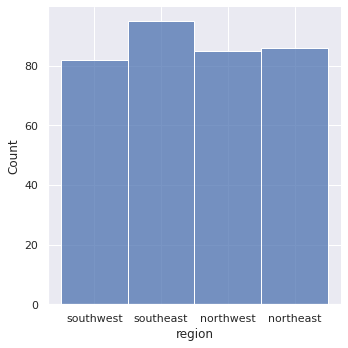

<Figure size 3020x1057 with 0 Axes>

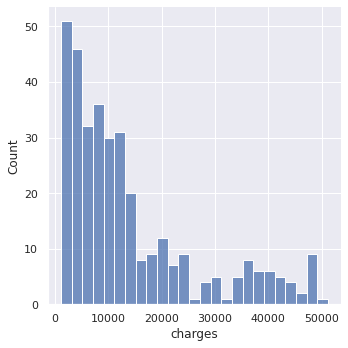

In [37]:
#lets check the distribution of each feature:
cols=df.columns
for col in cols:
    plt.figure(figsize=(20,7),dpi=151)
    sns.displot(df[col],bins=25)

##### Observation:

    1. Insurance takers between age group 18 to 20 is relatively high
    2. Insurance takers with 0 or 1 childern is relatively high
    3. Non smokers are more (almost 4 times ) than Non smokers
    4. Insurance takers in 'Southeast' is slightly higher than other region
    5. Distribution of charges is 'Right Skewed' i.e Charges between 1121.87 to 15000 is relatively high

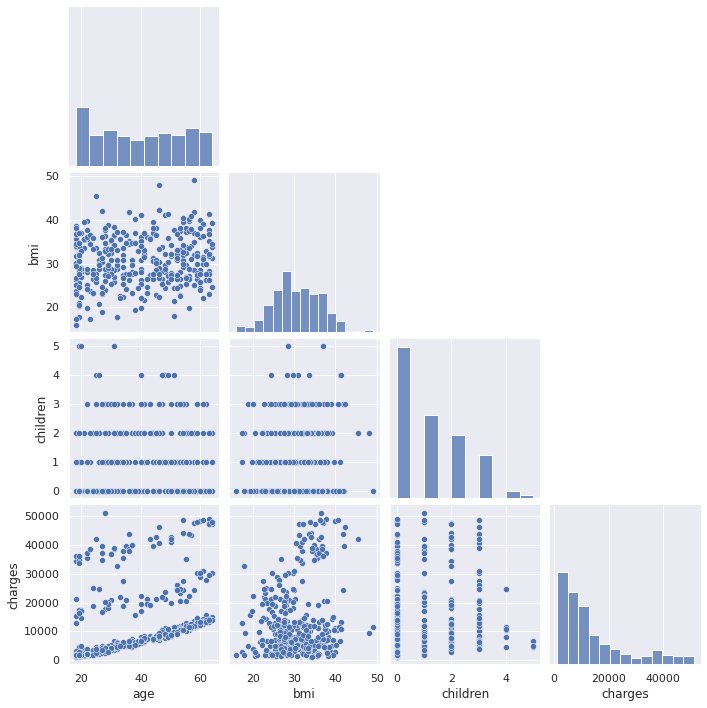

In [38]:
sns.pairplot(df,corner=True)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

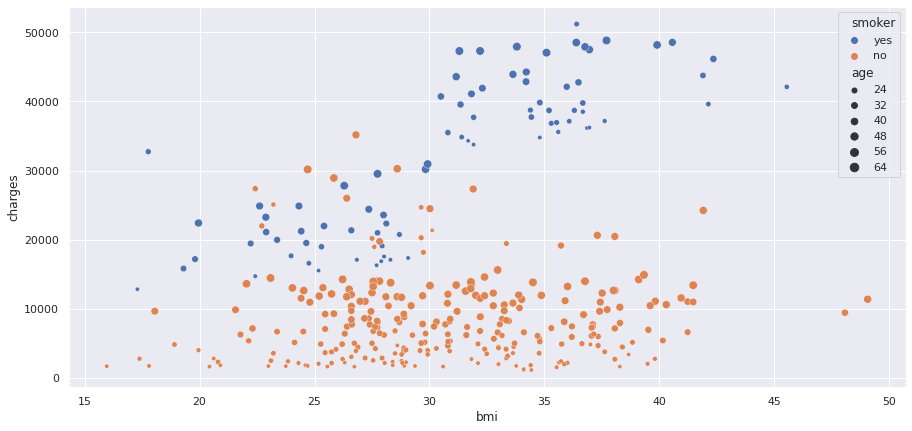

In [39]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['smoker'],size=df['age'])

In [40]:
#Smokers have higher charges

In [41]:
corr=df.corr()

<AxesSubplot:>

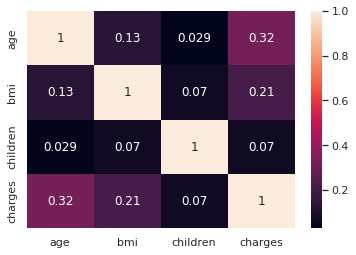

In [42]:
sns.heatmap(corr,annot=True)

In [43]:
#not strong but there small correlation between age-charges-&bmi

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    object 
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    object 
 5   region    348 non-null    object 
 6   charges   348 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 19.2+ KB


In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
#Lets onvert categorical data into dummies

In [47]:
cat_dummied_df=pd.get_dummies(cat_df,drop_first=True)

In [48]:
df_with_dummies=pd.concat([cat_dummied_df,num_df_charges],axis=1)

In [49]:
df_with_dummies

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...
343,1,0,0,0,0,63,36.765,0,13981.85035
344,0,0,0,1,0,49,41.470,4,10977.20630
345,0,0,0,1,0,34,29.260,3,6184.29940
346,1,0,0,1,0,33,35.750,2,4889.99950


-------
## Linear Regression Model:

In [50]:
df_with_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520


In [51]:
X=df_with_dummies.drop('charges',axis=1)

In [52]:
y=df_with_dummies['charges']

In [53]:
#Lets split the data for train and test

from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
#Lets scale the data:

from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()

In [57]:
scaler.fit(X_train)

StandardScaler()

In [58]:
X_train=scaler.transform(X_train)

In [59]:
X_test=scaler.transform(X_test)

In [60]:
#Lets create Linear Regression model:

from sklearn.linear_model import LinearRegression

In [61]:
model_lm=LinearRegression()

In [62]:
model_lm.fit(X_train,y_train)

LinearRegression()

In [63]:
predicted_y_lm=model_lm.predict(X_test)

In [64]:
residuals=y_test-predicted_y_lm

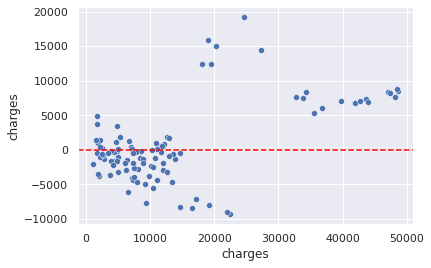

In [65]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,ls='--',color='red')

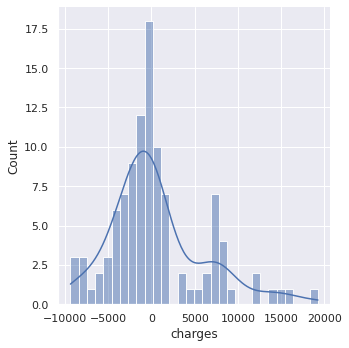

In [66]:
sns.displot(residuals,bins=30,kde=True)

In [67]:
#Lets check errors:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
RMSE_lm=np.sqrt(mean_squared_error(y_test,predicted_y_lm)) #Root Mean Squared Error
MAE_lm=mean_absolute_error(y_test,predicted_y_lm) # Mean Absolute Error

In [69]:
RMSE_lm #Error is bit high

5468.157175541749

In [70]:
MAE_lm # Error is bit high

3832.114669489381

In [71]:
model_lm.score(X_train,y_train)

0.7485779691233729

In [72]:
model_lm.score(X_test,y_test)

0.8186936823254897

In [73]:
r2_score_lm=r2_score(y_test,predicted_y_lm)

In [74]:
r2_score_lm

0.8186936823254897

In [75]:
print("r2_score of Linear Regression Model is: {} ".format(np.round(r2_score(y_test,predicted_y_lm),2)))
print("------------")
print("Mean Absolute Error with Linear Regression Model is: ",np.round(MAE_lm,2))
print("Root Mean Squared Error with Linear Regression Model is: ",np.round(RMSE_lm,2))

r2_score of Linear Regression Model is: 0.82 
------------
Mean Absolute Error with Linear Regression Model is:  3832.11
Root Mean Squared Error with Linear Regression Model is:  5468.16


---------
## Linear Regression (with Polynomial Features): 

In [76]:
X=df_with_dummies.drop('charges',axis=1)

In [77]:
X.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,0,0,1,19,27.900,0
1,1,0,0,1,0,18,33.770,1
2,1,0,0,1,0,28,33.000,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.880,0


In [78]:
y=df_with_dummies['charges']

In [79]:
# lets convert Independent features into polynomial features:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [81]:
poly_features=poly_converter.fit_transform(X)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [84]:
scaler=StandardScaler()

In [85]:
scaler.fit(X_train)

StandardScaler()

In [86]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [87]:
model_lm_poly=LinearRegression()

In [88]:
model_lm_poly.fit(X_train,y_train)

LinearRegression()

In [89]:
predicted_y_lm_poly=model_lm_poly.predict(X_test)

In [90]:
residuals_lm_poly=y_test-predicted_y_lm_poly

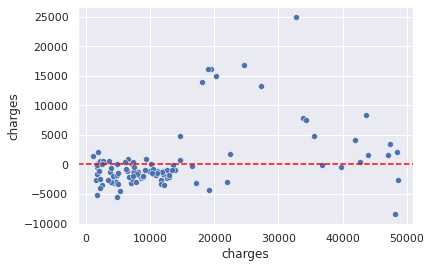

In [91]:
sns.scatterplot(x=y_test,y=residuals_lm_poly)
plt.axhline(y=0,ls='--',color='red')

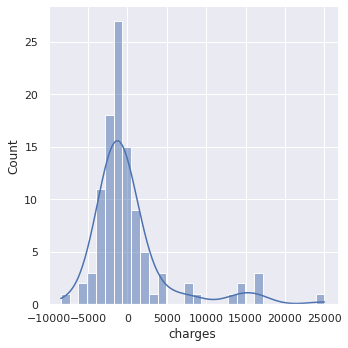

In [92]:
sns.displot(residuals_lm_poly,bins=30,kde=True)

In [93]:
RMSE_lm_poly=np.sqrt(mean_squared_error(y_test,predicted_y_lm_poly))
MAE_lm_poly=mean_absolute_error(y_test,predicted_y_lm_poly)

In [94]:
RMSE_lm_poly #Root mean sqared error of Linear Regression model with Polynomial features

5107.13200689449

In [95]:
RMSE_lm #Root mean sqared error of Linear Regression

5468.157175541749

In [96]:
MAE_lm_poly #Mean absolute error of Linear Regression model with Polynomial features

3016.6390204399618

In [97]:
MAE_lm #Mean absolute error of Linear Regression model

3832.114669489381

In [98]:
#looks like error is reduced when Polynomial features are introduced:

#lets try adjusting degree of polynomial:
RMSE_TEST=[]
RMSE_TRAIN=[]

for d in range(1,6):
    
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler=StandardScaler()
    
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    
    model_lm_poly=LinearRegression()
    
    model_lm_poly.fit(X_train,y_train)
    
    predicted_y_lm_poly_test=model_lm_poly.predict(X_test)
    
    predicted_y_lm_poly_train=model_lm_poly.predict(X_train)
    
    RMSE_Tests=np.sqrt(mean_squared_error(y_test,predicted_y_lm_poly_test))
    RMSE_Trains=np.sqrt(mean_squared_error(y_train,predicted_y_lm_poly_train))
    
    RMSE_TEST.append(RMSE_Tests)
    RMSE_TRAIN.append(RMSE_Trains)
    
    


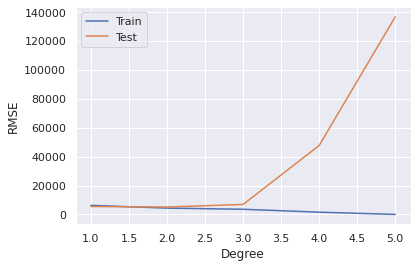

In [99]:
plt.plot(range(1,6),RMSE_TRAIN,label='Train')
plt.plot(range(1,6),RMSE_TEST,label='Test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

##### Conclusion: After 2 nd degree Test Error increases, so it is better to keep degree=2 only

In [100]:
r2_score_lm_poly=r2_score(y_test,predicted_y_lm_poly)

In [101]:
r2_score_lm_poly

0.8418441991226375

In [102]:
print("r2_score of Linear Regression Model (with Polynomial features) is: {} ".format(np.round(r2_score(y_test,predicted_y_lm_poly),2)))
print("------------")
print("Mean Absolute Error with Linear Regression Model (with Polynomial features) is: ",np.round(MAE_lm_poly,2))
print("Root Mean Squared Error with Linear Regression Model (with Polynomial features) is: ",np.round(RMSE_lm_poly,2))

r2_score of Linear Regression Model (with Polynomial features) is: 0.84 
------------
Mean Absolute Error with Linear Regression Model (with Polynomial features) is:  3016.64
Root Mean Squared Error with Linear Regression Model (with Polynomial features) is:  5107.13


-----------
## Elastic Net Regression (with grid search)

In [103]:
df_with_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520


In [104]:
X=df_with_dummies.drop('charges',axis=1)
y=df_with_dummies['charges']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [106]:
scaler=scaler.fit(X_train)

In [107]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [108]:
#elastcnet model

from sklearn.linear_model import ElasticNet

In [109]:
model_en=ElasticNet(max_iter=1000000,tol=0.01)

In [110]:
#grid search

from sklearn.model_selection import GridSearchCV

In [111]:
param_grid={'alpha':[0.001,0.1,1,2,5,10,25,50,100,150,200,300,500],
            'l1_ratio':[0.001,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,0.99,1]}

In [112]:
grid_model=GridSearchCV(estimator=model_en,param_grid=param_grid,scoring=['neg_root_mean_squared_error','r2'],cv=10,verbose=1,return_train_score=True,refit='r2' )

In [113]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 143 candidates, totalling 1430 fits


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000, tol=0.01),
             param_grid={'alpha': [0.001, 0.1, 1, 2, 5, 10, 25, 50, 100, 150,
                                   200, 300, 500],
                         'l1_ratio': [0.001, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 0.99, 1]},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'r2'], verbose=1)

In [114]:
grid_model.best_estimator_

ElasticNet(alpha=300, l1_ratio=1, max_iter=1000000, tol=0.01)

In [115]:
predicted_y_en=grid_model.predict(X_test)

In [116]:
residuals_en=y_test-predicted_y_en

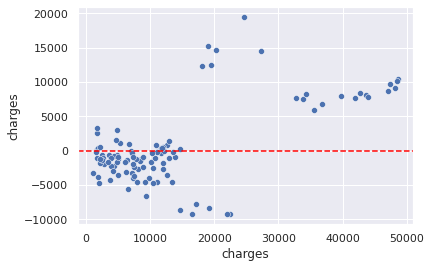

In [117]:
sns.scatterplot(x=y_test,y=residuals_en)
plt.axhline(y=0,ls='--',color='red')

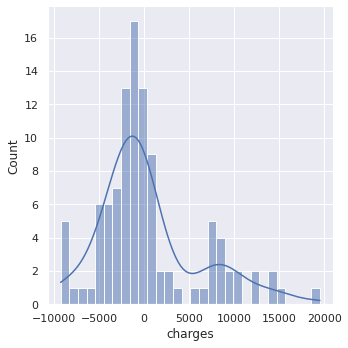

In [118]:
sns.displot(residuals_en,kde=True,bins=30)

In [119]:
RMSE_en=np.sqrt(mean_squared_error(y_test,predicted_y_en))
MAE_en=mean_absolute_error(y_test,predicted_y_en)

In [120]:
RMSE_en

5633.272086892477

In [121]:
MAE_en

3965.8900864559782

In [122]:
grid_model.score(X_test,y_test)

0.8075790231339668

In [123]:
grid_model.score(X_train,y_train)

0.7457675863840995

In [124]:
r2_score_en=r2_score(y_test,predicted_y_en)

In [125]:
r2_score_en

0.8075790231339668

In [126]:
print("r2_score of Elastic Net Model (using GridSearchCV) is: {} ".format(np.round(r2_score(y_test,predicted_y_en),2)))
print("------------")
print("Mean Absolute Error of Elastic Net Model (using GridSearchCV) is: ",np.round(MAE_en,2))
print("Root Mean Squared Error of Elastic Net Model (using GridSearchCV)  is: ",np.round(RMSE_en,2))

r2_score of Elastic Net Model (using GridSearchCV) is: 0.81 
------------
Mean Absolute Error of Elastic Net Model (using GridSearchCV) is:  3965.89
Root Mean Squared Error of Elastic Net Model (using GridSearchCV)  is:  5633.27


## Final Observations:-
  
###        Linear Regression Model:
        
        r2_score of Linear Regression Model is: 0.76 
        Mean Absolute Error with Linear Regression Model is:  3987.96
        Root Mean Squared Error with Linear Regression Model is:  5803.76
        
###        Linear Regression Model (with Polynomial Features) :

        r2_score of Linear Regression Model (with Polynomial features) is: 0.84 
        Mean Absolute Error with Linear Regression Model (with Polynomial features) is:  2912.59
        Root Mean Squared Error with Linear Regression Model (with Polynomial features) is:  4811.33


###        ElasticNet Model:

        r2_score of Elastic Net Model (using GridSearchCV) is: 0.76 
        Mean Absolute Error of Elastic Net Model (using GridSearchCV) is:  4000.77
        Root Mean Squared Error of Elastic Net Model (using GridSearchCV)  is:  5822.3

# Conclusion:

Linear regression with Polynomial features with 2nd degree is the best option to predict the insurance

------------------
# Final Model: 

In [127]:
#insurance predictor final model

In [128]:
X=df_with_dummies.drop('charges',axis=1)
y=df['charges']

In [129]:
final_poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [130]:
final_poly_features=final_poly_converter.fit_transform(X)

In [131]:
def insurance_predictor ():
    age=int(input("Enter age: "))
    sex=input("Enter Sex: ")
    bmi=float(input("Enter bmi"))
    childrens=int(input("Enter number of Childerns:"))
    smoke=input("Are you smoker? enter yes/no")
    region=input("Enter region: ")
    
    
    #SEX
    if sex=='male':
        sex_male=1
    else:
        sex_male=0
    
    
    #SMOKE
    if smoke=='yes':
        smoker_yes=1
    else:
        smoker_yes=0
    
    #REGION
    
    if region=='northwest':
        region_northwest=1
    else:
        region_northwest=0
    
    
    if region=='southeast':
        region_southeast=1
    else:
        region_southeast=0
        
        
    if region=='southwest':
        region_southwest=1
    else:
        region_southwest=0
        
    
    if region=='northeast':
        region_northeast=0
        region_southwest=0
        region_southeast=0
        
        
    X=[[sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,childrens]]
    
    poly_converter=PolynomialFeatures(degree=2,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    
    #scaler=StandardScaler()
    #poly_features=scaler.fit_transform(poly_features)
    

    
    model=LinearRegression()
    model.fit(final_poly_features,y)
    
    predicted_result= model.predict(poly_features)
    
    print(predicted_result)
        
        
    
        
    
    

    
    

In [132]:
#insurance_predictor()

--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--